import pandas as pd

url = 'http://www.tromscup.com/index.php?k=G15-16&sesong=1'

tables = pd.read_html(url)
df = pd.DataFrame(tables[0])

ar_klasse_verdi = df.iloc[0, 0]

# Endre verdi i celle (1,0) til "sammenlagt plassering"
df.iloc[1, 0] = "sammenlagt plassering"

df = df.drop(0).reset_index(drop=True)

# Fjern siste rad og reset index
df = df.drop(df.index[-1]).reset_index(drop=True)

# Angi første rad som kolonneoverskrifter
df.columns = df.iloc[0]

# Fjern første rad som nå er kolonneoverskrifter
df = df.drop(df.index[0])

import re
def extract_values(ar_klasse_verdi):
    # Finn kjønn
    kjonn_match = re.search(r'(Gutter|Kvinner)', ar_klasse_verdi)
    kjonn = kjonn_match.group(0) if kjonn_match else None

    # Finn klasse
    klasse_match = re.search(r'(\d+-\d+)', ar_klasse_verdi)
    klasse = klasse_match.group(0) if klasse_match else None

    # Finn sesong
    sesong_match = re.search(r'(\d{4}/\d{4})', ar_klasse_verdi)
    sesong = sesong_match.group(0) if sesong_match else None

    return kjonn, klasse, sesong

# Ekstrakt verdier
kjonn, klasse, sesong = extract_values(ar_klasse_verdi)

# Legg til nye kolonner i DataFrame
df['kjønn'] = kjonn
df['klasse'] = klasse
df['sesong'] = sesong

# Flytt kolonnene til ønskede posisjoner (5, 6, 7)
cols = list(df.columns)
insert_positions = {'kjønn': 4, 'klasse': 5, 'sesong': 6}

for col, pos in insert_positions.items():
    cols.remove(col)
    cols.insert(pos, col)

df = df[cols]

# Step 1: Melt the DataFrame to convert from wide to long format
id_vars = ["sammenlagt plassering", "Navn", "Poeng", "Treff", "kjønn", "klasse", "sesong"]
df_long = pd.melt(df, id_vars=id_vars, var_name="Konkuranse", value_name="utfall")

# Step 2: Reorder and rename columns as needed
df_long = df_long[id_vars + ["Konkuranse", "utfall"]]

new_column_names = {
    'Konkuranse': 'konkuranse',
    'Navn': 'navn',
    'poeng': 'total poeng',
    'treff': 'total treff',
    'kjønn': 'kjønn',
    'klasse': 'klasse',
    'sesong': 'sessong',
    'utfall': 'tromscup poeng/treff'
}

# Rename columns
df_long.rename(columns=new_column_names, inplace=True)

# Move 'Konkuranse' column to the front
df_long = df_long[['konkuranse'] + [col for col in df_long.columns if col != 'konkuranse']]


# Extract 'plassering' and 'treff' from 'tromscup poeng/treff'
df_long[['plassering', 'treff']] = df_long['tromscup poeng/treff'].str.split('/', expand=True)

# Convert 'plassering' and 'treff' to numeric type
df_long['plassering'] = pd.to_numeric(df_long['plassering'], errors='coerce')
df_long['treff'] = pd.to_numeric(df_long['treff'], errors='coerce')

mapping = {
    100: 1, 80: 2, 60: 3, 50: 4, 45: 5, 40: 6, 36: 7, 32: 8, 29: 9, 26: 10,
    24: 11, 22: 12, 20: 13, 18: 14, 16: 15, 15: 16, 14: 17, 13: 18, 12: 19,
    11: 20, 10: 21, 9: 22, 8: 23, 7: 24, 6: 25, 5: 26, 4: 27, 3: 28, 2: 29, 1: 30
}

df_long['plassering'] = df_long['plassering'].map(mapping)

# Display the final reshaped DataFrame
print(df_long)


In [33]:
import pandas as pd
import re

def process_tromscup_results(url):
    # Step 1: Read HTML tables from the URL
    tables = pd.read_html(url)
    df = pd.DataFrame(tables[0])

    # Extract 'ar_klasse_verdi' from first cell of first row
    ar_klasse_verdi = df.iloc[0, 0]

    # Step 2: Change cell value at (1, 0) to "sammenlagt plassering"
    df.iloc[1, 0] = "sammenlagt plassering"

    # Step 3: Drop first row and reset index
    df = df.drop(0).reset_index(drop=True)

    # Step 4: Remove last row and reset index
    df = df.drop(df.index[-1]).reset_index(drop=True)

    # Step 5: Set first row as column headers and drop it
    df.columns = df.iloc[0]
    df = df.drop(df.index[0])

    # Step 6: Extract values using regex function
    def extract_values(ar_klasse_verdi):
        kjonn_match = re.search(r'(Gutter|Menn|Kvinner|Jenter)', ar_klasse_verdi)
        kjonn = kjonn_match.group(0) if kjonn_match else None

        klasse_match = re.search(r'(\d{2}-\d{2}|Senior)', ar_klasse_verdi)
        klasse = klasse_match.group(0) if klasse_match else None

        sesong_match = re.search(r'(\d{4}/\d{4})', ar_klasse_verdi)
        sesong = sesong_match.group(0) if sesong_match else None

        return kjonn, klasse, sesong

    kjonn, klasse, sesong = extract_values(ar_klasse_verdi)

    # Step 7: Add new columns to DataFrame
    df['kjønn'] = kjonn
    df['klasse'] = klasse
    df['sesong'] = sesong

    # Step 8: Rearrange columns as desired
    cols = list(df.columns)
    insert_positions = {'kjønn': 4, 'klasse': 5, 'sesong': 6}

    for col, pos in insert_positions.items():
        cols.remove(col)
        cols.insert(pos, col)

    df = df[cols]

    # Step 9: Melt DataFrame to convert from wide to long format
    id_vars = ["sammenlagt plassering", "Navn", "Poeng", "Treff", "kjønn", "klasse", "sesong"]
    df_long = pd.melt(df, id_vars=id_vars, var_name="Konkuranse", value_name="utfall")

    # Step 10: Reorder and rename columns as needed
    df_long = df_long[id_vars + ["Konkuranse", "utfall"]]

    new_column_names = {
        'Konkuranse': 'konkuranse',
        'Navn': 'navn',
        'Poeng': 'total poeng',
        'Treff': 'total treff',
        'kjønn': 'kjønn',
        'klasse': 'klasse',
        'sesong': 'sesong',
        'utfall': 'tromscup poeng/treff'
    }

    df_long.rename(columns=new_column_names, inplace=True)

    # Step 11: Move 'Konkuranse' column to the front
    df_long = df_long[['konkuranse'] + [col for col in df_long.columns if col != 'konkuranse']]

    # Step 12: Extract 'plassering' and 'treff' from 'tromscup poeng/treff'
    df_long[['plassering', 'treff']] = df_long['tromscup poeng/treff'].str.split('/', expand=True)

    # Step 13: Map 'plassering' values using a mapping dictionary
    mapping = {
        100: 1, 80: 2, 60: 3, 50: 4, 45: 5, 40: 6, 36: 7, 32: 8, 29: 9, 26: 10,
        24: 11, 22: 12, 20: 13, 18: 14, 16: 15, 15: 16, 14: 17, 13: 18, 12: 19,
        11: 20, 10: 21, 9: 22, 8: 23, 7: 24, 6: 25, 5: 26, 4: 27, 3: 28, 2: 29, 1: 30
    }

    df_long['plassering'] = df_long['plassering'].astype(float).map(mapping)

    # Step 14: Convert 'plassering' and 'treff' columns to numeric type
    df_long['plassering'] = pd.to_numeric(df_long['plassering'], errors='coerce')
    df_long['treff'] = pd.to_numeric(df_long['treff'], errors='coerce')

    return df_long

# Example usage:



In [34]:
url = 'http://tromscup.com/index.php?k=MSen&sesong=7'
test = process_tromscup_results(url)

In [35]:
base_url = 'http://tromscup.com/index.php?'

# Define seasons and categories
seasons = range(1, 8)
categories = ['J13-14', 'J15-16', 'K17-19', 'K20-21', 'KSen', 'G13-14', 'G15-16', 'M17-19', 'M20-21', 'MSen', 'MilA']

# Generate URLs
urls = []
for sesong in seasons:
    for k in categories:
        url = f"{base_url}k={k}&sesong={sesong}"
        urls.append(url)


In [36]:
# Define seasons and categories for sesong 8-11
seasons_2 = range(8, 12)
categories_2 = ['J13-14', 'J15-16', 'K17-19', 'K20-22', 'KSen', 'G13-14', 'G15-16', 'M17-19', 'M20-22', 'MSen', 'MilA']

# Generate URLs
urls_2 = []
for sesong in seasons_2:
    for k in categories_2:
        url_2 = f"{base_url}k={k}&sesong={sesong}"
        urls_2.append(url_2)


In [37]:
all_urls = urls + urls_2

In [38]:
all_results = []
for url in all_urls:
    try:
        result_df = process_tromscup_results(url)
        all_results.append(result_df)
        print(f"Processed URL: {url}")
    except Exception as e:
        print(f"Failed to process URL: {url}")
        print(e)

# Concatenate all result DataFrames into a single DataFrame
final_df = pd.concat(all_results, ignore_index=True)

Processed URL: http://tromscup.com/index.php?k=J13-14&sesong=1
Processed URL: http://tromscup.com/index.php?k=J15-16&sesong=1
Processed URL: http://tromscup.com/index.php?k=K17-19&sesong=1
Processed URL: http://tromscup.com/index.php?k=K20-21&sesong=1
Processed URL: http://tromscup.com/index.php?k=KSen&sesong=1
Processed URL: http://tromscup.com/index.php?k=G13-14&sesong=1
Processed URL: http://tromscup.com/index.php?k=G15-16&sesong=1
Processed URL: http://tromscup.com/index.php?k=M17-19&sesong=1
Processed URL: http://tromscup.com/index.php?k=M20-21&sesong=1
Processed URL: http://tromscup.com/index.php?k=MSen&sesong=1
Processed URL: http://tromscup.com/index.php?k=MilA&sesong=1
Processed URL: http://tromscup.com/index.php?k=J13-14&sesong=2
Processed URL: http://tromscup.com/index.php?k=J15-16&sesong=2
Processed URL: http://tromscup.com/index.php?k=K17-19&sesong=2
Processed URL: http://tromscup.com/index.php?k=K20-21&sesong=2
Processed URL: http://tromscup.com/index.php?k=KSen&sesong=2


In [39]:
df = final_df

split_columns = df['konkuranse'].str.extract(r'(?P<sted>.+?)\s+(?P<dato>\d{2}\.\d{2}\.\d{4})\s+(?P<konkurranse>.+)')

# Merge split columns into the original DataFrame
df = df.drop('konkuranse', axis=1).join(split_columns)

In [40]:
df['mesterskap'] = 'tromscup'
# Update 'mesterskap' to 'KM' if 'konkurranse' contains 'KM' or '(KM)'
df.loc[df['konkurranse'].str.contains(r'\bKM\b', case=False, na=False), 'mesterskap'] = 'KM'

# Remove 'KM' and '(KM)' from 'konkurranse'
df['konkurranse'] = df['konkurranse'].str.replace(r'\s*\(?KM\)?', '', case=False, regex=True).str.strip()



In [41]:
import numpy as np

# Define the conditions for the `klasse` and `konkurranse`
klasse_young = ['13-14', '15-16', '13-14', '15-16', 'Supersprint']
klasse_adult = ['17-19', '20-22','20-21','MSen', 'MilA']

# Function to calculate `bom`
def calculate_bom(row):
    if pd.isna(row['treff']):
        return np.nan
    if row['klasse'] in klasse_young:
        return 10 - row['treff']
    elif row['klasse'] in klasse_adult:
        if row['konkurranse'] == 'Sprint':
            return 10 - row['treff']
        elif row['konkurranse'] in ['Fellesstart', 'Normal']:
            return 20 - row['treff']
    return np.nan  # Default case

In [42]:
df['bom'] = df.apply(calculate_bom, axis=1)

In [43]:
new_order = ['dato','sesong','mesterskap', 'konkurranse','sted','navn','kjønn','klasse','plassering','treff','bom','sammenlagt plassering','total poeng','total treff','tromscup poeng/treff']

# Reorder the columns
df = df.reindex(columns=new_order)

In [44]:
file_path = 'output.csv'
df.to_csv(file_path, index=False)  # Set index=False to exclude row numbers in the output


In [52]:
filtered_df = final_df[final_df['navn'] == 'Daniel Nyvoll']

# Display the filtered DataFrame
print(filtered_df)

                                konkuranse sammenlagt plassering  \
2372             Målselv 07.12.2014 Sprint                   14.   
2400           Nordreisa 13.12.2014 Normal                   14.   
2428               Bardu 28.12.2014 Sprint                   14.   
2456            Laksvatn 04.01.2015 Sprint                   14.   
2484             Målselv 10.01.2015 Sprint                   14.   
2512        Målselv 10.01.2015 Fellesstart                   14.   
2540              Tromsø 17.01.2015 Sprint                   14.   
2568         Tromsø 18.01.2015 Fellesstart                   14.   
2596     Indre Balsfjord 08.02.2015 Sprint                   14.   
2624         Bjerkvik 15.02.2015 KM NOrmal                   14.   
2652             Målselv 08.03.2015 Normal                   14.   
2680            Skjervøy 14.03.2015 Sprint                   14.   
4020             Målselv 06.12.2015 Sprint                   18.   
4044             Målselv 27.12.2015 Normal      

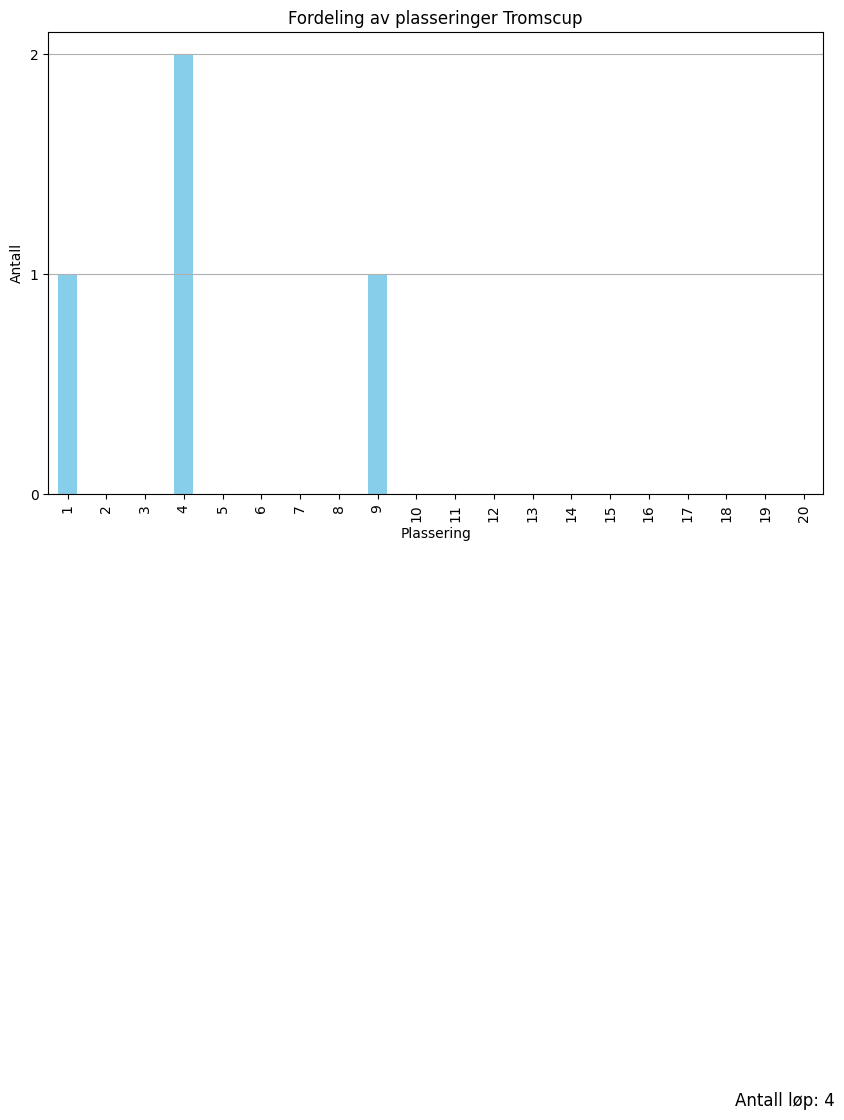

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure all values from 1 to 20 are included in value_counts
value_counts = filtered_df['plassering'].value_counts().sort_index().reindex(range(1, 21), fill_value=0)

# Plotting the bar plot
plt.figure(figsize=(10, 6))  # Optional: adjust figure size

# Plotting bar chart
value_counts.plot(kind='bar', color='skyblue')
total_count = value_counts.sum()

# Adding titles and labels
plt.title('Fordeling av plasseringer Tromscup')
plt.xlabel('Plassering')
plt.ylabel('Antall')
plt.grid(axis='y') 
plt.yticks(range(0, value_counts.max() + 1))
plt.text(len(value_counts) - 1.5, -2.8, f'Antall løp: {total_count}', ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()
